In [1]:
library(cicero)
library(monocle3)
library(Seurat)
library(Signac)
library(GenomicRanges)
library(BSgenome.Hsapiens.UCSC.hg38)

Loading required package: monocle3

Loading required package: Biobase

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To cite Bioconductor, see
    'citation("Biobase")', and for packages 'citation("pkgname")'.


Loading required package: SingleCellExperiment

Loading required package: SummarizedExperiment

Loading requi

In [2]:
# Create a folder to save results
output_folder <- "08b_cicero_output"
dir.create(output_folder)

# Load samples


In [10]:
# load in the combined sobjsobj <- readRDS('{PATH_1}')

In [4]:
sobj

An object of class Seurat 
344955 features across 7994 samples within 4 assays 
Active assay: SCT (22084 features, 3000 variable features)
 3 other assays present: ATAC, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [11]:
# make cds
input_cds <- suppressWarnings(new_cell_data_set(as.matrix(GetAssayData(sobj, assay = "ATAC", slot = "data")),
    cell_metadata = sobj@meta.data))


In [12]:
input_cds

class: cell_data_set 
dim: 279098 7994 
metadata(1): cds_version
assays(1): counts
rownames(279098): chr1-9739-10688 chr1-15699-16633 ...
  chrY-56870607-56871492 chrY-56879536-56880351
rowData names(0):
colnames(7994): DASA1_AAACAGCCAGTTTGTG-1 DASA1_AAACCGAAGGCGCTTA-1 ...
  DMSO2_TTTGTGAAGTAGCTTA-1 DMSO2_TTTGTGGCACCAGCAT-1
colData names(36): nCount_ATAC nFeature_ATAC ... nFeature_PRTB
  Size_Factor
reducedDimNames(0):
mainExpName: NULL
altExpNames(0):

In [13]:
# Ensure there are no peaks included with zero reads
input_cds <- input_cds[Matrix::rowSums(exprs(input_cds)) != 0,] 

In [14]:
set.seed(1)
input_cds <- detect_genes(input_cds)
input_cds <- estimate_size_factors(input_cds)
input_cds <- preprocess_cds(input_cds, method = "LSI")
input_cds <- reduce_dimension(input_cds, reduction_method = 'UMAP', 
                              preprocess_method = "LSI")

No trajectory to plot. Has learn_graph() been called yet?

cluster not found in colData(cds), cells will not be colored

cluster_cells() has not been called yet, can't color cells by cluster



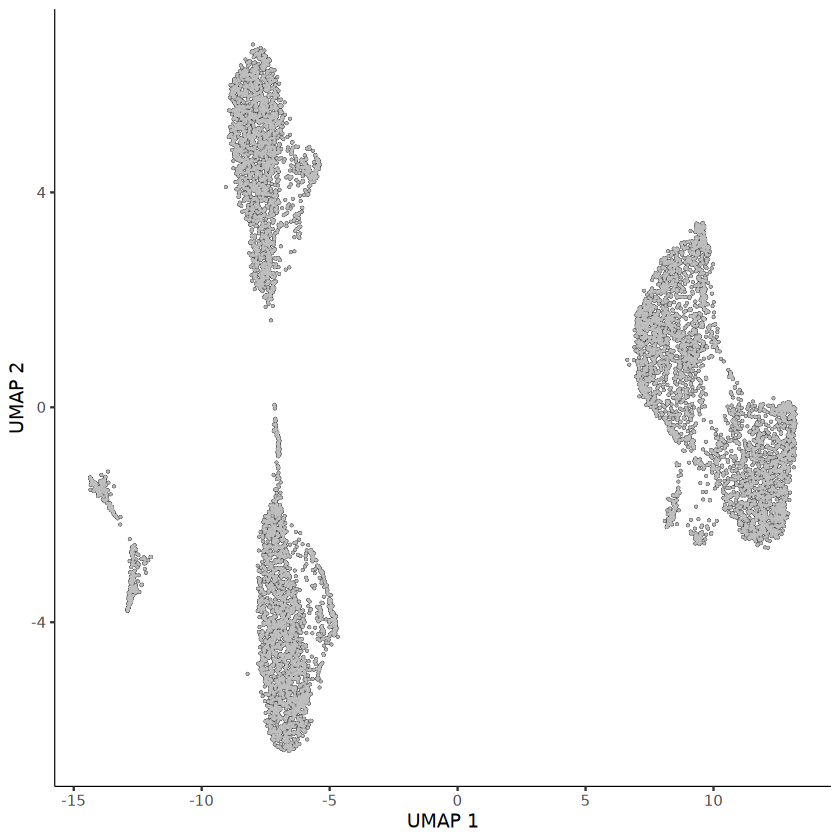

In [16]:
plot_cells(input_cds)

In [17]:
umap_coords <- reducedDims(input_cds)$UMAP
cicero_cds <- make_cicero_cds(input_cds, reduced_coordinates = umap_coords)

Overlap QC metrics:
Cells per bin: 50
Maximum shared cells bin-bin: 44
Mean shared cells bin-bin: 0.332058455687492
Median shared cells bin-bin: 0



In [48]:
# load hg38 and format it for running cicero
hg38_temp <- as.data.frame(seqinfo(BSgenome.Hsapiens.UCSC.hg38))[1:25, 1:2]
hg38 <- data.frame(col1 = rownames(hg38_temp), col2 = hg38_temp[,1])


In [49]:
hg38

col1,col2
<chr>,<int>
chr1,248956422
chr2,242193529
chr3,198295559
chr4,190214555
chr5,181538259
chr6,170805979
chr7,159345973
chr8,145138636
chr9,138394717


In [50]:
# run cicero, this takes a while (~233min on this dataset)
conns <- run_cicero(cicero_cds, hg38, sample_num = 100) 
head(conns)

[1] "Starting Cicero"
[1] "Calculating distance_parameter value"
[1] "Running models"
[1] "Assembling connections"
[1] "Successful cicero models:  11422"
[1] "Other models: "

Zero or one element in range 
                         945 
[1] "Models with errors:  0"
[1] "Done"


,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,chr1-100005635-100006316,chr1-99749326-99750443,9.180459e-04
2,chr1-100005635-100006316,chr1-99750588-99751454,5.086939e-06
3,chr1-100005635-100006316,chr1-99751766-99752692,1.511351e-03
4,chr1-100005635-100006316,chr1-99757609-99758572,-2.949046e-05
5,chr1-100005635-100006316,chr1-99758705-99759611,6.194179e-03
6,chr1-100005635-100006316,chr1-99761898-99762247,0.000000e+00


In [57]:
# save connections saveRDS(conns, file = '{PATH_2}')

In [4]:
# load connsconns <- readRDS('{PATH_2}')

# plot connections

In [52]:
BSgenome.Hsapiens.UCSC.hg38

| BSgenome object for Human
| - organism: Homo sapiens
| - provider: UCSC
| - genome: hg38
| - release date: 2023/01/31
| - 711 sequence(s):
|     chr1                    chr2                    chr3                   
|     chr4                    chr5                    chr6                   
|     chr7                    chr8                    chr9                   
|     chr10                   chr11                   chr12                  
|     chr13                   chr14                   chr15                  
|     ...                     ...                     ...                    
|     chr19_KV575256v1_alt    chr19_KV575257v1_alt    chr19_KV575258v1_alt   
|     chr19_KV575259v1_alt    chr19_KV575260v1_alt    chr19_MU273387v1_alt   
|     chr22_KN196485v1_alt    chr22_KN196486v1_alt    chr22_KQ458387v1_alt   
|     chr22_KQ458388v1_alt    chr22_KQ759761v1_alt    chrX_KV766199v1_alt    
|     chrX_MU273395v1_alt     chrX_MU273396v1_alt     chrX_MU273397v1_alt    
|

In [4]:
# download and unzipgtf_path <- '{PATH_3}'gene_anno <- rtracklayer::readGFF(gtf_path)

In [ ]:
data(gene_annotation_sample)

In [ ]:
head(gene_annotation_sample)

,chromosome,start,end,strand,feature,gene,transcript,symbol
,<fct>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
411414,chr18,11103,11595,+,lincRNA,ENSG00000262352.1,ENST00000575820.1,AP005530.1
411415,chr18,15617,15822,+,lincRNA,ENSG00000262352.1,ENST00000575820.1,AP005530.1
411416,chr18,11191,11595,+,lincRNA,ENSG00000262352.1,ENST00000572573.1,AP005530.1
411417,chr18,13152,13354,+,lincRNA,ENSG00000262352.1,ENST00000572573.1,AP005530.1
411418,chr18,15617,15928,+,lincRNA,ENSG00000262352.1,ENST00000572573.1,AP005530.1
411419,chr18,45004,45235,+,pseudogene,ENSG00000262181.1,ENST00000575066.1,RP11-683L23.2


In [5]:
# get gene_anno to be the right format
chromosome <- gene_anno$seqid
start <- gene_anno$start
end <- gene_anno$end
strand <- gene_anno$strand
feature <- gene_anno$gene_type
gene <- gene_anno$gene_id
transcript <- gene_anno$transcript_id
symbol <- gene_anno$gene_name

gene_anno <- data.frame(chromosome, start, end, strand, feature, gene, transcript, symbol)

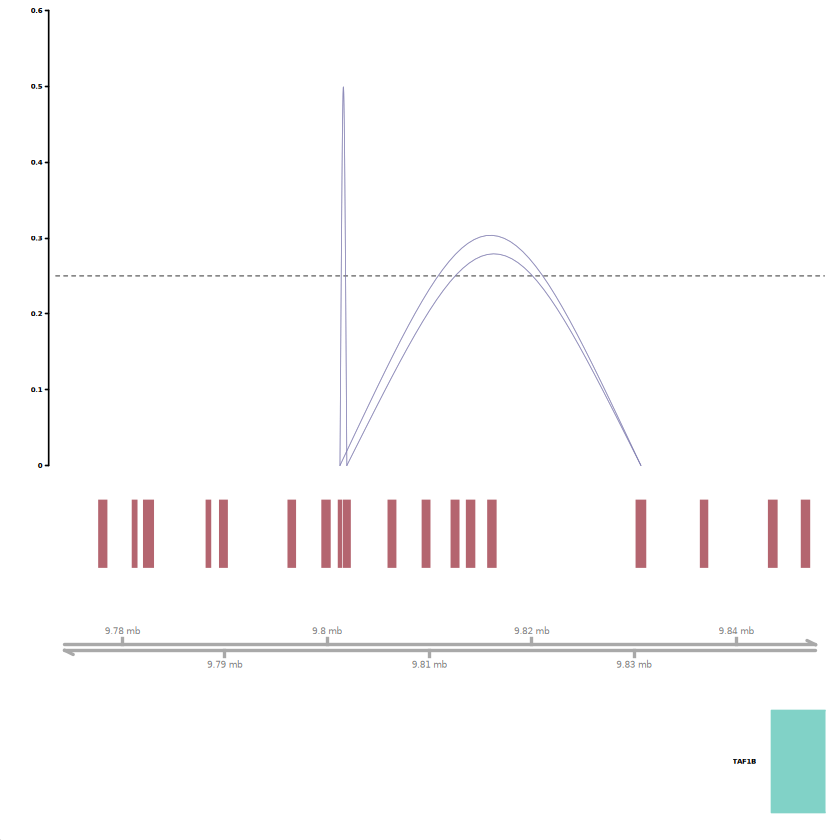

In [58]:
plot_connections(conns, "chr2", 9773451, 9848598,
                 gene_model = gene_anno, 
                 coaccess_cutoff = .25, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )

No trajectory to plot. Has learn_graph() been called yet?

Warning message:
"ggrepel: 1 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


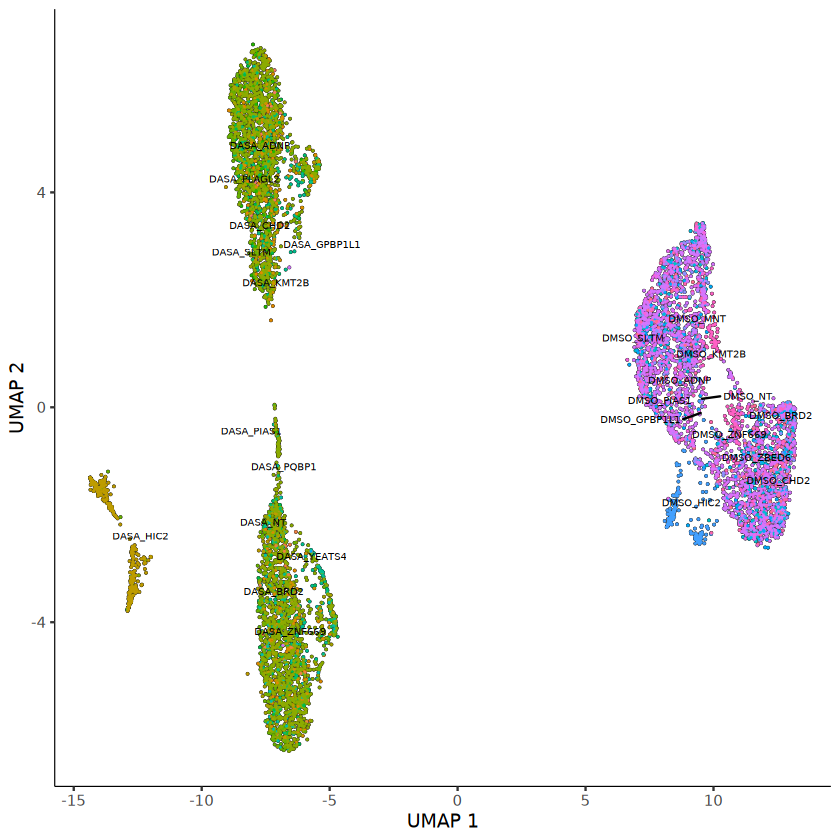

In [69]:
plot_cells(input_cds, color_cells_by = "treatment_and_guidecapture")

In [3]:
# load hic2 differential peaksdiff_peaks <- read.csv('{PATH_4}')

In [72]:
diff_peaks[1:20, 1:ncol(diff_peaks)]

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr4-168257537-168258490,4.623357e-53,5.596211,0.181,0.003,1.290370e-47
2,chr7-128116669-128117601,3.204012e-50,5.531988,0.168,0.004,8.942334e-45
3,chr3-10763876-10765358,1.545156e-41,5.493037,0.141,0.003,4.312499e-36
4,chr11-69264362-69265503,3.149171e-32,5.299103,0.115,0.003,8.789273e-27
5,chr10-69107390-69108284,9.910451e-29,5.068601,0.104,0.003,2.765987e-23
6,chr11-44916483-44917470,1.125400e-40,4.910012,0.147,0.006,3.140969e-35
7,chr1-94023830-94024744,6.312230e-43,4.810219,0.160,0.006,1.761731e-37
8,chr4-44523996-44525063,2.196134e-33,4.787492,0.125,0.005,6.129365e-28
9,chr11-64598853-64599781,7.345023e-60,4.759039,0.221,0.009,2.049981e-54


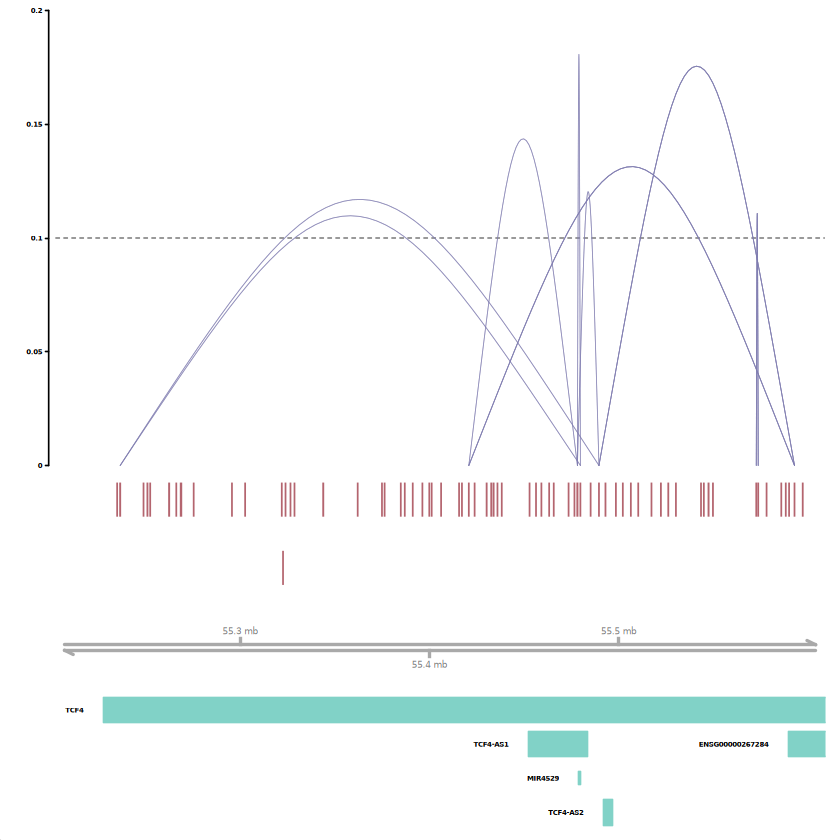

In [59]:
plot_connections(conns, "chr18", (55222334-20000), (55588629+20000),
                 gene_model = gene_anno, 
                 coaccess_cutoff = .1, 
                 connection_width = .5, 
                 collapseTranscripts = "longest" )

In [3]:
table(conns$coaccess == 0 )


   FALSE     TRUE 
23270992  7450586 

## Find overlaps between conns and diff_peaks

In [13]:
head(diff_peaks)

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr4-168257537-168258490,4.623357e-53,5.596211,0.181,0.003,1.290370e-47
2,chr7-128116669-128117601,3.204012e-50,5.531988,0.168,0.004,8.942334e-45
3,chr3-10763876-10765358,1.545156e-41,5.493037,0.141,0.003,4.312499e-36
4,chr11-69264362-69265503,3.149171e-32,5.299103,0.115,0.003,8.789273e-27
5,chr10-69107390-69108284,9.910451e-29,5.068601,0.104,0.003,2.765987e-23
6,chr11-44916483-44917470,1.125400e-40,4.910012,0.147,0.006,3.140969e-35


In [14]:
head(conns)

,Peak1,Peak2,coaccess
,<chr>,<fct>,<dbl>
1,chr1-100005635-100006316,chr1-99749326-99750443,9.180459e-04
2,chr1-100005635-100006316,chr1-99750588-99751454,5.086939e-06
3,chr1-100005635-100006316,chr1-99751766-99752692,1.511351e-03
4,chr1-100005635-100006316,chr1-99757609-99758572,-2.949046e-05
5,chr1-100005635-100006316,chr1-99758705-99759611,6.194179e-03
6,chr1-100005635-100006316,chr1-99761898-99762247,0.000000e+00


In [30]:
# Extract chromosome, start, and end positions from X column
df1_ranges <- with(diff_peaks, GRanges(X, 
                                       IRanges(start = as.numeric(sub(".*-", "", sub("chr[0-9XYMT]+-", "", X))),
                                               end = as.numeric(sub("-.*", "", sub(".*-", "", X))))))

df2_ranges_peak1 <- with(conns, GRanges(Peak1, 
                                        IRanges(start = as.numeric(sub(".*-", "", sub("chr[0-9XYMT]+-", "", Peak1))),
                                                end = as.numeric(sub("-.*", "", sub(".*-", "", Peak1))))))

df2_ranges_peak2 <- with(conns, GRanges(Peak2, 
                                        IRanges(start = as.numeric(sub(".*-", "", sub("chr[0-9XYMT]+-", "", Peak2))),
                                                end = as.numeric(sub("-.*", "", sub(".*-", "", Peak2))))))

# Find overlaps
overlaps_peak1 <- findOverlaps(df1_ranges, df2_ranges_peak1)
overlaps_peak2 <- findOverlaps(df1_ranges, df2_ranges_peak2)

# Extract overlapping rows from df2
df2_overlapping <- unique(conns[sort(unique(c(subjectHits(overlaps_peak1), subjectHits(overlaps_peak2)))), ])

# View overlapping rows
df2_overlapping


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'unique': object 'df2' not found


In [32]:
dim(df2_overlapping)

[1] 1868810       3

In [38]:
(dim(df2_overlapping)[1]/dim(conns)[1])*100

# ~6% of conns fall in diff_peaks

[1] 5.985125

In [39]:
# save
saveRDS(df2_overlapping, file = "08b_cicero_output/dasaHIC2_dasaNT_conns.rds")

# Generate ccans

In [2]:
# load connsconns <- readRDS('{PATH_2}')hic2_conns <- readRDS("08b_cicero_output/dasaHIC2_dasaNT_conns.rds")

In [3]:
dim(conns)

[1] 31224242        3

In [4]:
# # This cell contains methods I tried to stop the kernel from breaking when running generate_ccans, but didn't work
# # subset conns
# subset_conns <- conns[sample(nrow(conns), nrow(conns)/100), ]
# dim(subset_conns)

# # drop na's
# valid_conns <- na.omit(conns, cols = "coaccess")
# # this is how many conns we lose
# dim(conns) - dim(valid_conns)
# # check for any nulls
# any(is.null(valid_conns$coaccess))

In [6]:
# only way I could get this to run is to hard set coaccess_cutoff_override
# default is it tries to calc one on it's own (coaccess_cutoff_override = NULL)
ccans <- generate_ccans(conns, coaccess_cutoff_override = 0.1)

[1] "Coaccessibility cutoff used: 0.1"


In [7]:
hic2_ccans <- generate_ccans(hic2_conns, coaccess_cutoff_override = 0.1) 

[1] "Coaccessibility cutoff used: 0.1"


In [8]:
dim(ccans)
head(ccans)

dim(hic2_ccans)
head(hic2_ccans)

[1] 110638      2

,Peak,CCAN
,<chr>,<dbl>
chr1-100034219-100035123,chr1-100034219-100035123,2
chr1-100037726-100038549,chr1-100037726-100038549,2
chr1-100048250-100049190,chr1-100048250-100049190,2
chr1-100065013-100065970,chr1-100065013-100065970,2
chr1-100123344-100124255,chr1-100123344-100124255,2
chr1-100127220-100128124,chr1-100127220-100128124,2


[1] 43084     2

,Peak,CCAN
,<chr>,<dbl>
chr1-1001625-1002442,chr1-1001625-1002442,1
chr1-10032422-10033334,chr1-10032422-10033334,2
chr1-1003306-1004067,chr1-1003306-1004067,1
chr1-1004778-1005671,chr1-1004778-1005671,1
chr1-100760266-100761193,chr1-100760266-100761193,3
chr1-100785405-100786314,chr1-100785405-100786314,4


## Generate Cicero gene activity scores

In [9]:
head(diff_peaks)

,X,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,chr4-168257537-168258490,4.623357e-53,5.596211,0.181,0.003,1.290370e-47
2,chr7-128116669-128117601,3.204012e-50,5.531988,0.168,0.004,8.942334e-45
3,chr3-10763876-10765358,1.545156e-41,5.493037,0.141,0.003,4.312499e-36
4,chr11-69264362-69265503,3.149171e-32,5.299103,0.115,0.003,8.789273e-27
5,chr10-69107390-69108284,9.910451e-29,5.068601,0.104,0.003,2.765987e-23
6,chr11-44916483-44917470,1.125400e-40,4.910012,0.147,0.006,3.140969e-35


In [16]:
#### Add a column for the fData table indicating the gene if a peak is a promoter ####
# Create a gene annotation set that only marks the transcription start sites of 
# the genes. We use this as a proxy for promoters.
# To do this we need the first exon of each transcript
pos <- subset(gene_anno, strand == "+")
pos <- pos[order(pos$start),] 
pos <- pos[!duplicated(pos$transcript),] # remove all but the first exons per transcript
pos$end <- pos$start + 1 # make a 1 base pair marker of the TSS

neg <- subset(gene_anno, strand == "-")
neg <- neg[order(neg$start, decreasing = TRUE),] 
neg <- neg[!duplicated(neg$transcript),] # remove all but the first exons per transcript
neg$start <- neg$end - 1

gene_annotation_sub <- rbind(pos, neg)

# Make a subset of the TSS annotation columns containing just the coordinates 
# and the gene name
gene_annotation_sub <- gene_annotation_sub[,c(1:3, 8)]

# Rename the gene symbol column to "gene"
names(gene_annotation_sub)[4] <- "gene"

input_cds <- annotate_cds_by_site(input_cds, gene_annotation_sub)

head(fData(input_cds))

#### Generate gene activity scores ####
# generate unnormalized gene activity matrix
unnorm_ga <- build_gene_activity_matrix(input_cds, hic2_conns)

# remove any rows/columns with all zeroes
unnorm_ga <- unnorm_ga[!Matrix::rowSums(unnorm_ga) == 0, !Matrix::colSums(unnorm_ga) == 0]

# make a list of num_genes_expressed
num_genes <- pData(input_cds)$num_genes_expressed
names(num_genes) <- row.names(pData(input_cds))

# normalize
cicero_gene_activities <- normalize_gene_activities(unnorm_ga, num_genes)      

DataFrame with 6 rows and 3 columns
                   num_cells_expressed   overlap        gene
                             <integer> <integer> <character>
chr1-9739-10688                    323        NA          NA
chr1-15699-16633                    42        NA          NA
chr1-17113-17962                    27         2   MIR6859-1
chr1-28862-29719                    55         2 MIR1302-2HG
chr1-30453-31327                    19        NA          NA
chr1-104544-105438                  15        NA          NA

In [17]:
cicero_gene_activities

  [[ suppressing 32 column names 'DASA1_AAACAGCCAGTTTGTG-1', 'DASA1_AAACCGAAGGCGCTTA-1', 'DASA1_AAACCGAAGTATTGGC-1' ... ]]

  [[ suppressing 32 column names 'DASA1_AAACAGCCAGTTTGTG-1', 'DASA1_AAACCGAAGGCGCTTA-1', 'DASA1_AAACCGAAGTATTGGC-1' ... ]]

  [[ suppressing 32 column names 'DASA1_AAACAGCCAGTTTGTG-1', 'DASA1_AAACCGAAGGCGCTTA-1', 'DASA1_AAACCGAAGTATTGGC-1' ... ]]



21865 x 7994 sparse Matrix of class "dgCMatrix"
                                                                                  
5S_rRNA           .            .            .            .            .           
7SK               .            .            .            .            .           
A1BG-AS1          .            .            .            .            9.131560e-05
A2M               .            .            .            .            .           
A2ML1             .            .            2.238580e-04 .            .           
A3GALT2           .            .            .            .            .           
A4GALT            .            .            .            .            .           
AAAS              .            1.743626e-03 1.575885e-04 2.310087e-04 .           
AACS              7.676463e-05 8.256133e-05 2.215944e-05 2.775247e-05 8.467596e-03
AACSP1            .            .            .            .            .           
AADACL4           .            .       

In [70]:
# Filter out rows without values
filtered_cicero_gene_activities <- cicero_gene_activities[rowSums(cicero_gene_activities) > 2, ]

length(rownames(filtered_cicero_gene_activities))

[1] 354

In [52]:
sobj <- readRDS('{PATH_5}')

In [53]:
DefaultAssay(sobj) <- "ATAC"

In [49]:
# link to seurat obj
links <- ConnectionsToLinks(conns = hic2_conns, ccans = hic2_ccans)
Links(sobj) <- links

In [54]:
CoveragePlot(subset(sobj, 
                  subset = treatment_and_guidecapture == "DASA_HIC2" | treatment_and_guidecapture == "DASA_NT"),
    region = diff_peaks$X[1:5],
    extend.upstream = 40000,
    extend.downstream = 20000)

ERROR: Error: TabixFile: Fragment file is not indexed.


In [33]:
CoveragePlot(subset(sobj, subset = treatment_and_guidecapture == "DASA_HIC2" | treatment_and_guidecapture == "DASA_NT"), 
    region = "chr18-40189344-40252549")

ERROR: Error: TabixFile: Fragment file is not indexed.
